## W4 Ex. 2
Implement the SAT solver using Qiskit for the same logic operator:
`(a NAND c) AND (b XOR d) AND (a AND b)`

        ┌───┐                                 ┌───┐┌───┐   ┌───┐┌───┐┌─┐      »
q227_0: ┤ H ├──■─────────■───────■─────────■──┤ H ├┤ X ├─■─┤ X ├┤ H ├┤M├──────»
        ├───┤  │         │       │         │  ├───┤├───┤ │ ├───┤├───┤└╥┘┌─┐   »
q227_1: ┤ H ├──┼────■────■───────■────■────┼──┤ H ├┤ X ├─■─┤ X ├┤ H ├─╫─┤M├───»
        ├───┤  │    │    │       │    │    │  ├───┤├───┤ │ ├───┤├───┤ ║ └╥┘┌─┐»
q227_2: ┤ H ├──■────┼────┼───────┼────┼────■──┤ H ├┤ X ├─■─┤ X ├┤ H ├─╫──╫─┤M├»
        ├───┤  │  ┌─┴─┐  │       │  ┌─┴─┐  │  ├───┤├───┤ │ ├───┤├───┤ ║  ║ └╥┘»
q227_3: ┤ H ├──┼──┤ X ├──┼───■───┼──┤ X ├──┼──┤ H ├┤ X ├─■─┤ X ├┤ H ├─╫──╫──╫─»
        └───┘┌─┴─┐├───┤  │   │   │  ├───┤┌─┴─┐└┬─┬┘└───┘   └───┘└───┘ ║  ║  ║ »
q227_4: ─────┤ X ├┤ X ├──┼───■───┼──┤ X ├┤ X ├─┤M├────────────────────╫──╫──╫─»
             └───┘└───┘┌─┴─┐ │ ┌─┴─┐└┬─┬┘└───┘ └╥┘                    ║  ║  ║ »
q227_5: ───────────────┤ X ├─■─┤ X ├─┤M├────────╫─────────────────────╫──╫──╫─»
                       └───┘ │ └┬─┬┘ └╥┘

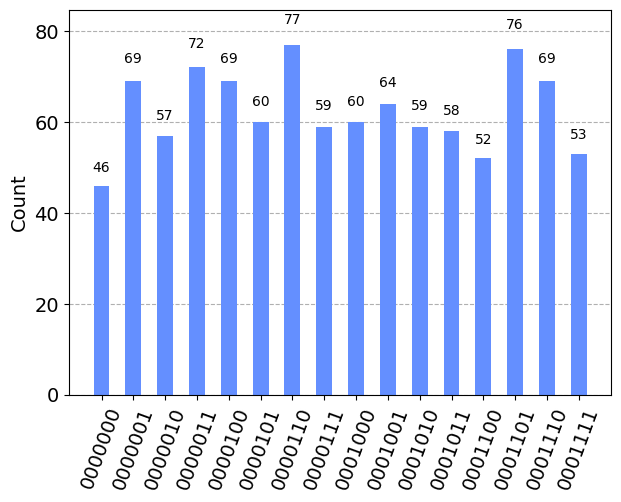

In [49]:
import os
from dotenv import load_dotenv
import qiskit
from qiskit import transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.tools.visualization import plot_histogram

from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library.standard_gates import CXGate, CZGate

load_dotenv()

IBM_QUANTUM_TOKEN = os.getenv('IBM_QUANTUM_TOKEN')
 
service = QiskitRuntimeService(channel="ibm_quantum", token=IBM_QUANTUM_TOKEN)

NUMBER_OF_QUBITS = 7

qr = qiskit.QuantumRegister(NUMBER_OF_QUBITS)
cr = qiskit.ClassicalRegister(NUMBER_OF_QUBITS)

qc = qiskit.QuantumCircuit(qr, cr)
qc.h([0, 1, 2, 3])
qc.append(CXGate().control(1), [0, 2, 4])
qc.x(4)
qc.append(CXGate(), [1, 3])
qc.append(CXGate().control(1), [0, 1, 5])
qc.append(CZGate().control(2), [3, 4, 5, 6])
qc.append(CXGate().control(1), [0, 1, 5])
qc.append(CXGate(), [1, 3])
qc.x(4)
qc.append(CXGate().control(1), [0, 2, 4])
qc.h([0, 1, 2, 3])
qc.x([0, 1, 2, 3])
qc.append(CZGate().control(2), [0, 1, 2, 3])
qc.x([0, 1, 2, 3])
qc.h([0, 1, 2, 3])

qc.measure(qr, cr)


backend = service.least_busy(simulator=True,operational=True,min_num_qubits=NUMBER_OF_QUBITS)

qc_transpiled = transpile(qc, backend)

# Draw circuit
print(qc.draw())
print(qc_transpiled.draw())

job = backend.run(qc_transpiled, shots=1000)
print(f"job id: {job.job_id()}")
result = job.result()
counts = result.get_counts()

plot_histogram(counts)